# Praktyczny Machine Learning w Pythonie
<br>
<img src="figures/pie.gif">

## Podstawy machine learningu i scikit-learn

Na tych warsztatach skupimy się na modelach liniowych. Modele liniowe odzielają obiekty różnych klas za pomocą linii prostej. Poniższy rysunek powinien to wyjaśnić:

<img src="figures/twofeature_b.png">

Kółkami są różne obiekty (konkretne irysy, odręcznie napisany cyfry, itp.)
Na osi X i Y mamy cechy obiektu (np. długość i szerokość płatków), a linia odziela przykłady różnych klas. Chcąc sklasyfikować **nowy** przykład patrzymy po której znajduje się stronie linii. Proste! A podstawa ogromnej części machine learningu. Jak mamy dobre cechy, to często wystarczy prosta kreska. Dlatego zwykle większość czasu w machine learningu nie jest poświęcane na znajdowanie najlepszego modelu, a zbieranie i czyszczenie danych.

## 1. Scikit-learn

Scikit-learn to bardzo popularny pakiet udostępniający różne algorytmy uczenia maszynowego. Używany jest w wielu firmach (w tym Microsoft, Evernote, ...). Skupimy się na modelach liniowych. Większość obiektów w scikit-learn implementuje interfejs **Estimator**. Według tej terminologii "dopasowywujemy" się do dancyh, aby potem "przewidzieć" klasę obiektu.

```{python}
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fits estimator to data. """
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``. """
        # compute predictions ``pred``
        return pred
```

**Każdy model to Estimator**, a jest ich bardzo dużo. Dodatkowo (do czego dojdziemy) różne preprocessingi na danych (np skalowanie) też implementują ten interfejs co bardzo upraszcza pracę z pakietem.

## Tworzymy nasz model liniowy odróżniający gatunek irysów Setosa od innych!

In [1]:
# Standardowe importowanie pakietów
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris

/Users/kudkudak/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### a) Ładujemy dane. Zapis iris.data[:,0:2] oznacza wybierz 2 pierwsze kolumny

In [2]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data[:,0:2], iris.target
Y = Y==0 # Troche magii żeby przewidywał tylko Iris Setosa albo "nie Iris Setosa"

In [3]:
iris.target_names # Setosa jest pierwsza (indeks 0)

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [4]:
# Ok! Dopasowywujemy model. 
from sklearn.svm import LinearSVC
# Regresja liniowa. Jeden z wielu modeli, których końcowym wynikiem jest linia prosta :)
pierwszy_model = LinearSVC() 
pierwszy_model.fit(X, Y) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
pierwszy_model.coef_

array([[-1.5414045 ,  2.28320578]])

### b) Model machine learningowy (*pierwszy_model* w naszym kodzie) można streścić jako:

"Jeśli -1.541405 \* **długość_płatka** + 2.28320578 \* **szerokość_płatka** >= 0 to jest to kwiatek gatunku *Iris Setosa*"

Nie uwierzycie ile modeli jest tak prostych :)

In [6]:
# Można zapytać (predict w Estimator)
pierwszy_model.predict([-0.109, 0.451]) # Kwiatek gatunku Iris Setosa! 

/Users/kudkudak/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

### c) Wizualizacja nauczonego modelu

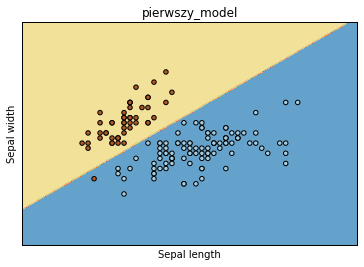

In [7]:
# Tworzymy siatkę punktów w odstępie 1e-2
h = 1e-2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Przewidujemy
Z = pierwszy_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysujemy ładny wykres 
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("pierwszy_model")

## Podstawy machine learningu

Podsumujmy co wiemy:
    
* Machine Learning zajmuje się tworzeniem modeli, które uczymy na podstawie danych
* Scikit-learn udostępnia wiele modeli, uczymy je za pomocą funkcji **fit**, przewidujemy za pomocą funkcji **predict**
* Ważną klasą modeli są modele liniowe na których się skupimy
* Znamy podstawy numpy i matplotlib

Wprowadzimy jeszcze 3 pojęcia:
* Testowanie modelu
* Preprocessing danych
* Hiperparametry



### a) Testowanie modelu

Chcemy wiedzieć jak dobry jest model który mamy. W tym celu zbiór danych dzielimy na ** zbiór trenujący ** i ** zbiór testujący **. Uczymy się na zbiorze trenującym, testujemy na testującym. Zwykle podsumowywujemy wynik modelu jedną liczbą, np. **dokładność** (ang. *accuracy*) czyli ilość procent poprawnie sklasyfikowanych przykładów

Przetestujmy jak sobie radzi nasz LogisticRegression na zbiorze Iris. Teraz weźmiemy wszystkie przykłady do nauki

In [9]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data, iris.target

In [10]:
# Dzielimy (scikit-learn)
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [11]:
print "Pierwszy przykład trenujący: ", X_train[0], "Klasa: ", Y_train[0]

Pierwszy przykład trenujący:  [ 6.7  3.3  5.7  2.5] Klasa:  2


In [69]:
drugi_model = LinearSVC(C=10) 
drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
Y_test_predicted = drugi_model.predict(X_test)

In [70]:
print "Przewidywania na pierwszych 10 przykladach: ", Y_test_predicted[0:10]

Przewidywania na pierwszych 10 przykladach:  [1 0 2 2 0 2 2 1 2 2]


In [71]:
import sklearn
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu to:  94.7368421053 %



### Ćwiczenie 4: Proszę zamienić LinearSVC na inny model, LogisticRegression

### b) Preprocessing danych

Wiele modeli lepiej działa na przekształconych danych. Przekształcenia to np.:
    
    * Normalizacja
    * Skalowanie
    * Przesunięcie
    * Obrót
    * Zmniejszenie ilości wymiarów
    
Skupimy się na ostatnim typie: zmniejszenie ilości wymiarów.
    
<img src="figures/dim-red.jpg"></img>
<img width="500" src="figures/Inversion.png"></img>

Zmniejszenie ilości wymiarów (ang. *dimensionality reduction*) to takie przekształcenie,
które zmniejsza wymiar danych (ilość cech) gubiąc minimalną ilość informacji.
Czasami dane można opisać mniejszą ilością cech (może lepszych!).

** Jest to bardzo ważna technika ** ze względu na dużą złożoność algorytmów machine learning (np. SVM z ćwiczenia 4 ma minimalną złożoność ok. O(n^2), w zależności od implementacji)

### c) Hiperparametry

Każdy model opisywany jest hiperparametrami. Przykładowo w regresji liniowej możemy podać "fit_intercept" co oznacza czy linia ma przechodzi przez środek współrzędnych czy nie. Innym parametrem jest C - intuicyjnie opisuje prostote modelu

In [33]:
#help(LogisticRegression)


### Ćwiczenie 5: Proszę spróbować zmienić parametr C w LinearSVC tak aby otrzymać 97% dokładności